# 주가데이터 수집

In [17]:
from pykrx import stock
import yfinance as yf
import pandas as pd

import matplotlib.pyplot as plt

### 삼천당제약 주가정보 수집


- 삼천당제약 종목 코드: 000250
- 시장 구분: 코스닥

In [30]:
# 2020년 2월 27일 ~. 2023년 3월 20일 까지의 종목 코드 : 000250인 삼천당제약 데이터 수집
df = stock.get_market_ohlcv("20200227", "20230320", "000250")
df.head()

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2020-02-27,42900,44200,41350,42000,511480,21745732900,-2.55
2020-02-28,40950,41550,38850,39500,513505,20590075750,-5.95
2020-03-02,40400,40600,39200,40400,262029,10490367200,2.28
2020-03-03,41500,42150,40550,41000,371479,15343418550,1.49
2020-03-04,41000,42050,40750,41950,269953,11232047000,2.32


In [31]:
# 종가 데이터만 추출
df = df[['종가']]
df.head()

,종가
날짜,
2020-02-27,42000
2020-02-28,39500
2020-03-02,40400
2020-03-03,41000
2020-03-04,41950


In [32]:
# 인덱스 설정
df = df.reset_index()
df.head()

,날짜,종가
0,2020-02-27,42000
1,2020-02-28,39500
2,2020-03-02,40400
3,2020-03-03,41000
4,2020-03-04,41950


In [33]:
# 컬럼명 변경
df.columns = ['day', 'price']
df.head()

,day,price
0,2020-02-27,42000
1,2020-02-28,39500
2,2020-03-02,40400
3,2020-03-03,41000
4,2020-03-04,41950


In [34]:
# 데이 컬럼 형식 -> 날짜로 
df['day'] = pd.to_datetime(df['day'])
df.index = df['day']
df.set_index('day', inplace=True)
df.head()

,price
day,
2020-02-27,42000
2020-02-28,39500
2020-03-02,40400
2020-03-03,41000
2020-03-04,41950


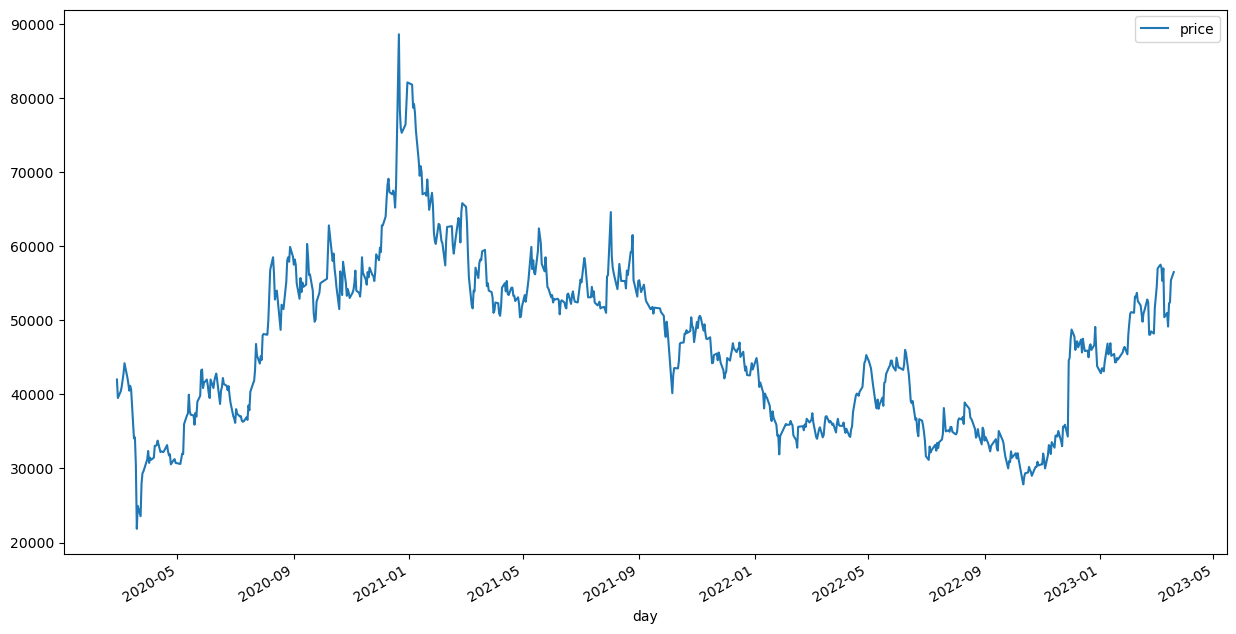

In [25]:
# 시각화
fig, ax = plt.subplots(figsize = (15, 8))
df.plot(ax=ax)
plt.show()

## 애플 주가 수집

- 애플 종목 코드: AAPL
- 시장 구분: 나스닥

In [26]:
apple_df = yf.download('AAPL',
                      start='2022-01-01',
                      end='2023-04-01',
                      progress=False)

apple_df = apple_df[["Close"]]

apple_df = apple_df.reset_index()

apple_df.columns = ['day', 'price']

apple_df['day'] = pd.to_datetime(apple_df['day'])

apple_df.index = apple_df['day']
apple_df.set_index('day', inplace=True)

In [27]:
apple_df

,price
day,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998
...,...
2023-03-27,158.279999
2023-03-28,157.649994
2023-03-29,160.770004


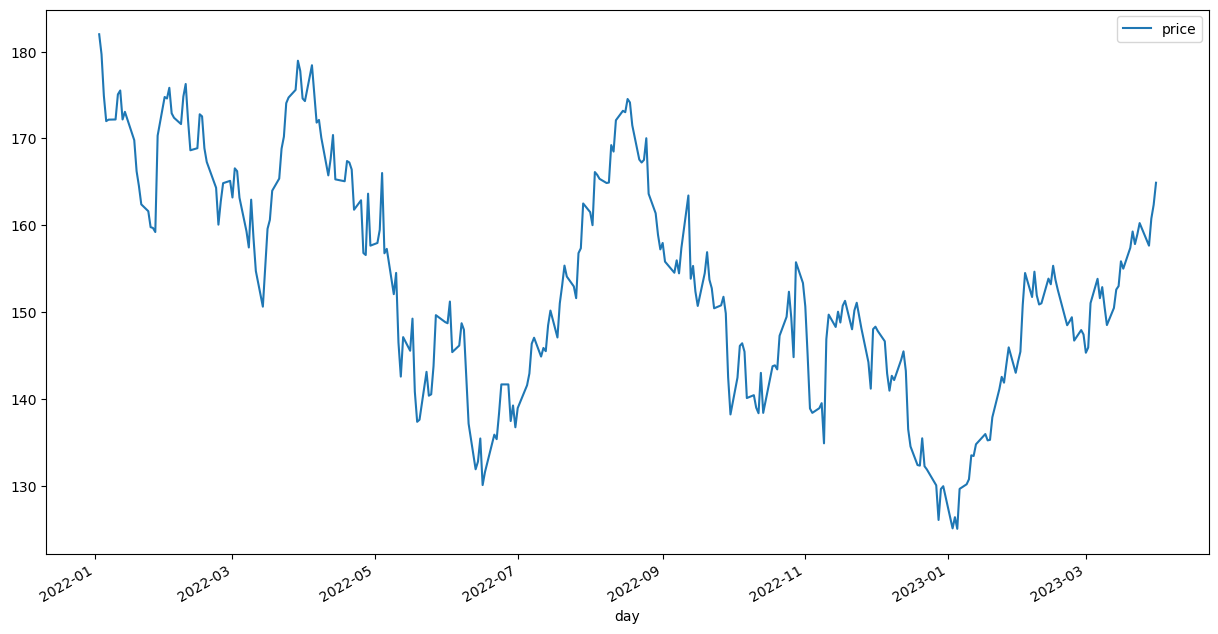

In [28]:
fig, ax = plt.subplots(figsize = (15, 8))
apple_df.plot(ax=ax)
plt.show()